In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
data=pd.read_csv("../input/project32/SampleSuperstore.csv")
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
data.shape

(9994, 13)

In [4]:
data.isnull().sum()


Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

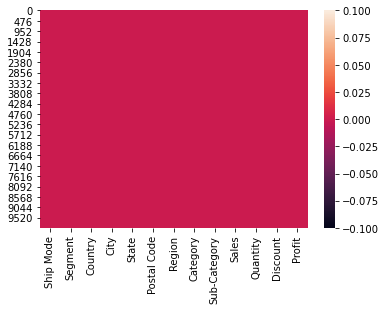

In [5]:

sn.heatmap(data.isnull())

In [6]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# Visualization:

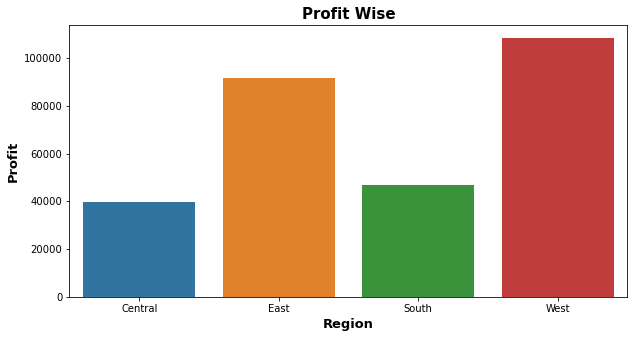

The lowest Profit is generated from South region. So we have to analyse where went wrong and how to increase the profit from South Region.


In [133]:
Region=pd.pivot_table(data,values="Sales",index="Region",aggfunc=np.sum)
Region1=pd.pivot_table(data,values="Profit",index="Region",aggfunc=np.sum)
Region2=pd.pivot_table(data,values="Quantity",index="Region",aggfunc=np.sum)
plt.figure(figsize=(10,5))
sn.barplot(Region1.index,Region1["Profit"])
plt.xlabel("Region",fontdict={"fontweight":"bold","fontsize":13})
plt.ylabel("Profit",fontdict={"fontweight":"bold","fontsize":13})
plt.title("Profit Wise",fontdict={"fontweight":"bold","fontsize":15})
plt.show()
print("The lowest Profit is generated from South region. So we have to analyse where went wrong and how to increase the profit from South Region.")

From south region Phones,Chairs and Accessories are making more profit compare to other Products.


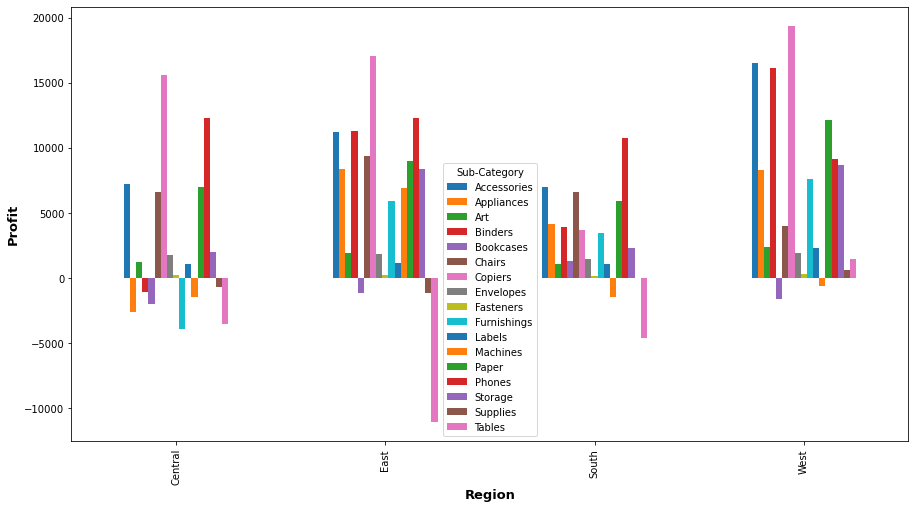

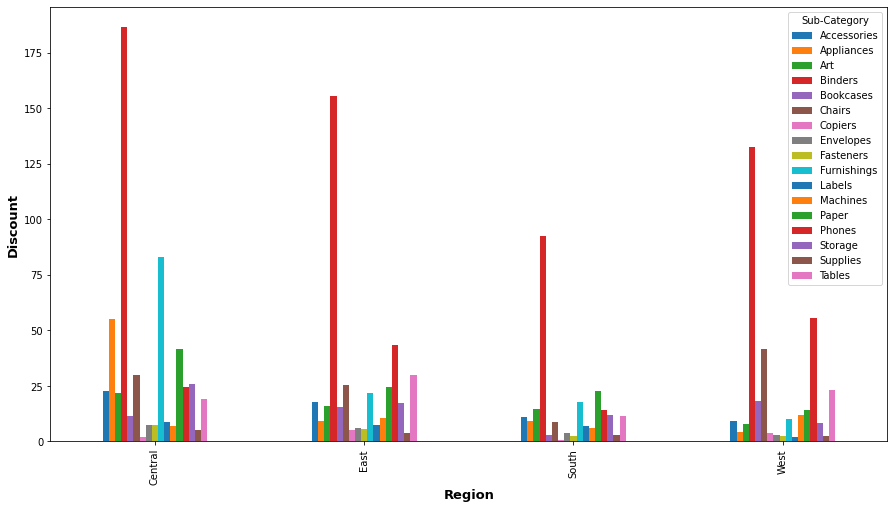

In [144]:
cs2=pd.pivot_table(data,values="Profit",index="Region",columns="Sub-Category",aggfunc=np.sum)
cs3=pd.pivot_table(data,values="Discount",index="Region",columns="Sub-Category",aggfunc=np.sum)
cs2.plot(kind="bar",figsize=[15,8])
plt.xlabel("Region",fontdict={"fontweight":"bold","fontsize":13})
plt.ylabel("Profit",fontdict={"fontweight":"bold","fontsize":13})
cs3.plot(kind="bar",figsize=[15,8])
plt.xlabel("Region",fontdict={"fontweight":"bold","fontsize":13})
plt.ylabel("Discount",fontdict={"fontweight":"bold","fontsize":13})
plt.show()


# Other regions except South region are commanly making more profit from Accessories and Copiers, So we have to take suggestions from other Regions.

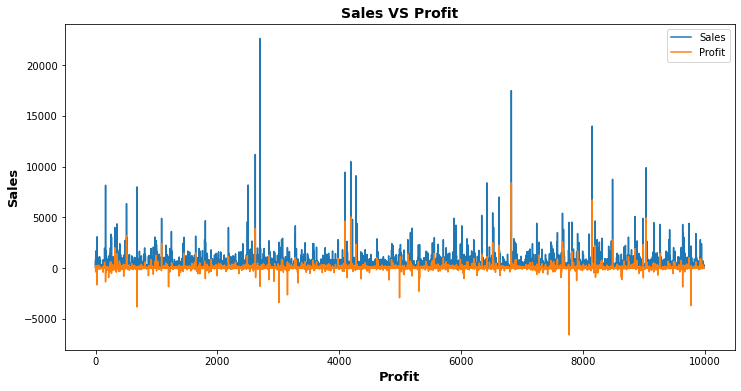

In [147]:
data[['Sales','Profit']].plot(kind='line', figsize=(12,6))
plt.title('Sales VS Profit',fontdict={"fontweight":"bold","fontsize":14})
plt.xlabel("Profit",fontdict={"fontweight":"bold","fontsize":13})
plt.ylabel("Sales",fontdict={"fontweight":"bold","fontsize":13})
plt.show()

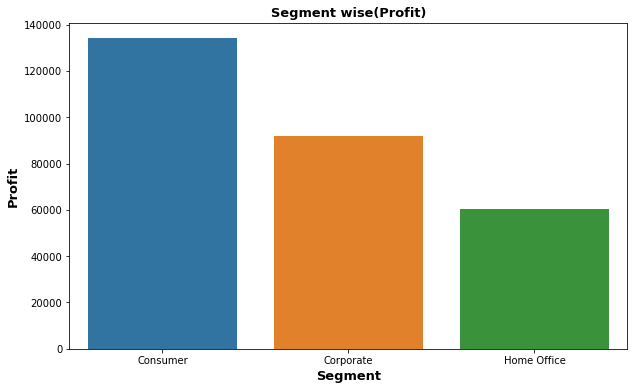

In [148]:
Segment=pd.pivot_table(data,values="Profit",index="Segment",aggfunc=np.sum)
plt.figure(figsize=[10,6])
sn.barplot(Segment.index,Segment["Profit"])
plt.ylabel("Profit",fontdict={"fontweight":"bold","fontsize":13})
plt.xlabel("Segment",fontdict={"fontweight":"bold","fontsize":13})
plt.title("Segment wise(Profit)",fontdict={"fontweight":"bold","fontsize":13})
plt.show()

# The highest profit generated from Consumer Segment, So better to concetrate more on Consumer segment in future days to make more profit.  

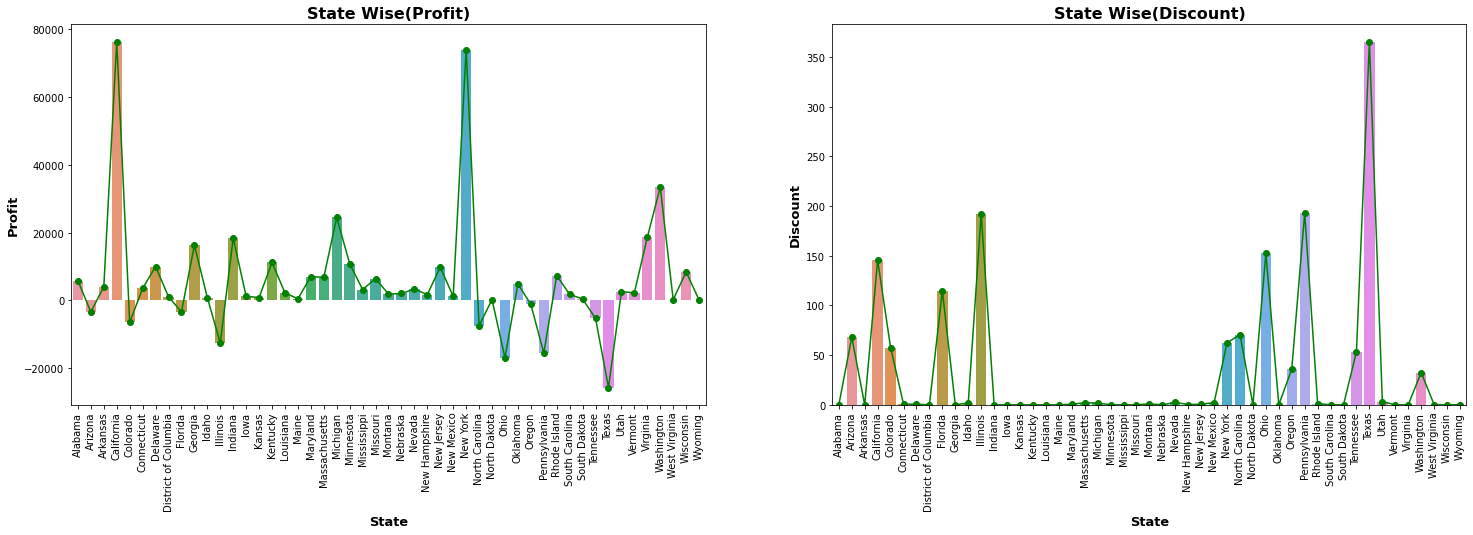

In [149]:
State=pd.pivot_table(data,values="Profit",index="State",aggfunc=np.sum)
State1=pd.pivot_table(data,values="Sales",index="State",aggfunc=np.sum)
State2=pd.pivot_table(data,values="Discount",index="State",aggfunc=np.sum)
plt.figure(figsize=[25,7])
plt.subplot(121)
plt.plot(State.index,State["Profit"],"go-",color="green")
sn.barplot(State.index,State["Profit"])
plt.xticks(rotation=90)
plt.xlabel("State",fontdict={"fontweight":"bold","fontsize":13})
plt.ylabel("Profit",fontdict={"fontweight":"bold","fontsize":13})
plt.title("State Wise(Profit)",fontdict={"fontweight":"bold","fontsize":16})
plt.subplot(122)
plt.plot(State2.index,State2["Discount"],"go-",color="green")
sn.barplot(State2.index,State2["Discount"])
plt.xticks(rotation=90)
plt.xlabel("State",fontdict={"fontweight":"bold","fontsize":13})
plt.ylabel("Discount",fontdict={"fontweight":"bold","fontsize":13})
plt.title("State Wise(Discount)",fontdict={"fontweight":"bold","fontsize":16})
plt.show()


# In some of the states there is a lesser profit the reason is disount percentage is more. We have to reduce or stop giving discount than we can increase our profit.

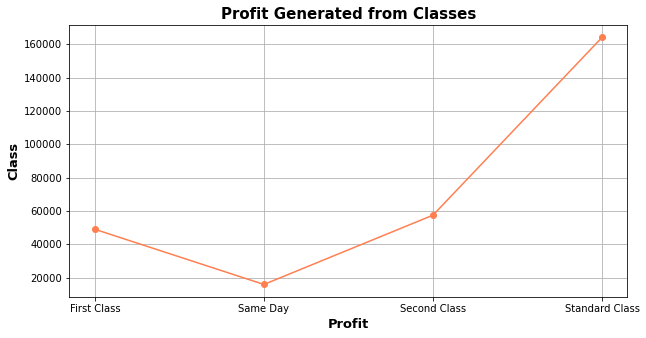

In [150]:
Ship_Mode=pd.pivot_table(data,values="Profit",index="Ship Mode",aggfunc=np.sum)
plt.figure(figsize=[10,5])
plt.plot(Ship_Mode.index,Ship_Mode["Profit"],"go-",color="coral",label="s")

plt.xlabel("Profit",fontdict={"fontweight":"bold","fontsize":13})
plt.ylabel("Class",fontdict={"fontweight":"bold","fontsize":13})
plt.title("Profit Generated from Classes",fontdict={"fontweight":"bold","fontsize":15})
plt.grid()
plt.show()


# Highest profit generated from Standard Class.

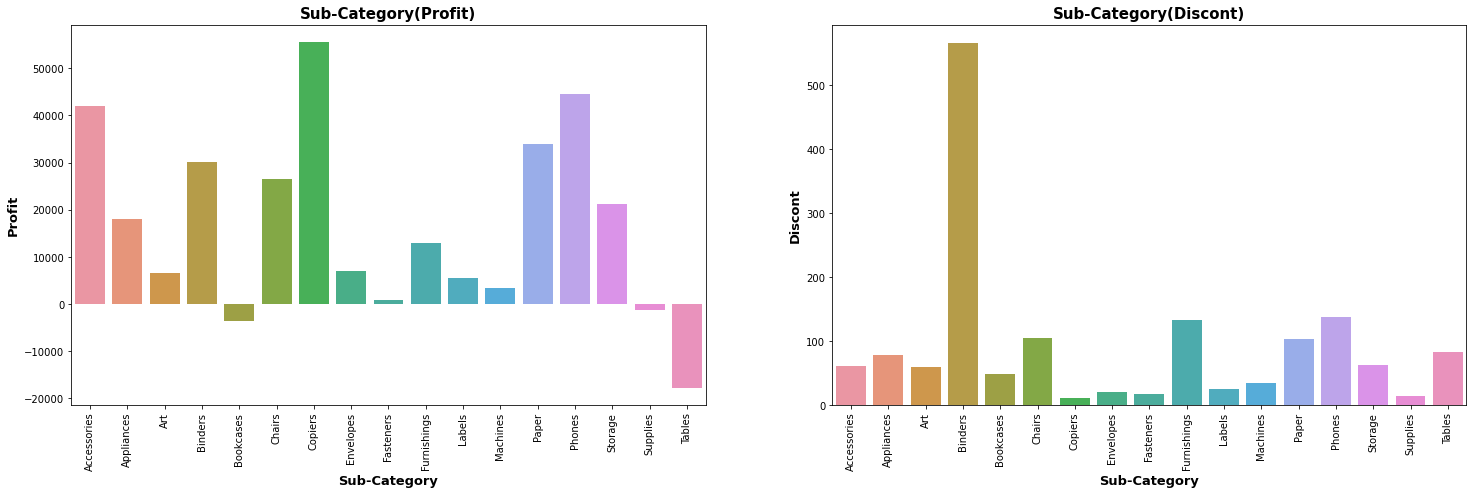

In [151]:
Category=pd.pivot_table(data,values="Profit",index="Sub-Category",aggfunc=np.sum)
Category1=pd.pivot_table(data,values="Discount",index="Sub-Category",aggfunc=np.sum)
plt.figure(figsize=[25,7])
plt.subplot(121)
sn.barplot(Category.index,Category["Profit"])
plt.xticks(rotation=90)
plt.xlabel("Sub-Category",fontdict={"fontweight":"bold","fontsize":13})
plt.ylabel("Profit",fontdict={"fontweight":"bold","fontsize":13})
plt.title("Sub-Category(Profit)",fontdict={"fontweight":"bold","fontsize":15})
plt.subplot(122)
sn.barplot(Category1.index,Category1["Discount"])
plt.xticks(rotation=90)
plt.xlabel("Sub-Category",fontdict={"fontweight":"bold","fontsize":13})
plt.ylabel("Discont",fontdict={"fontweight":"bold","fontsize":13})
plt.title("Sub-Category(Discont)",fontdict={"fontweight":"bold","fontsize":15})
plt.show()


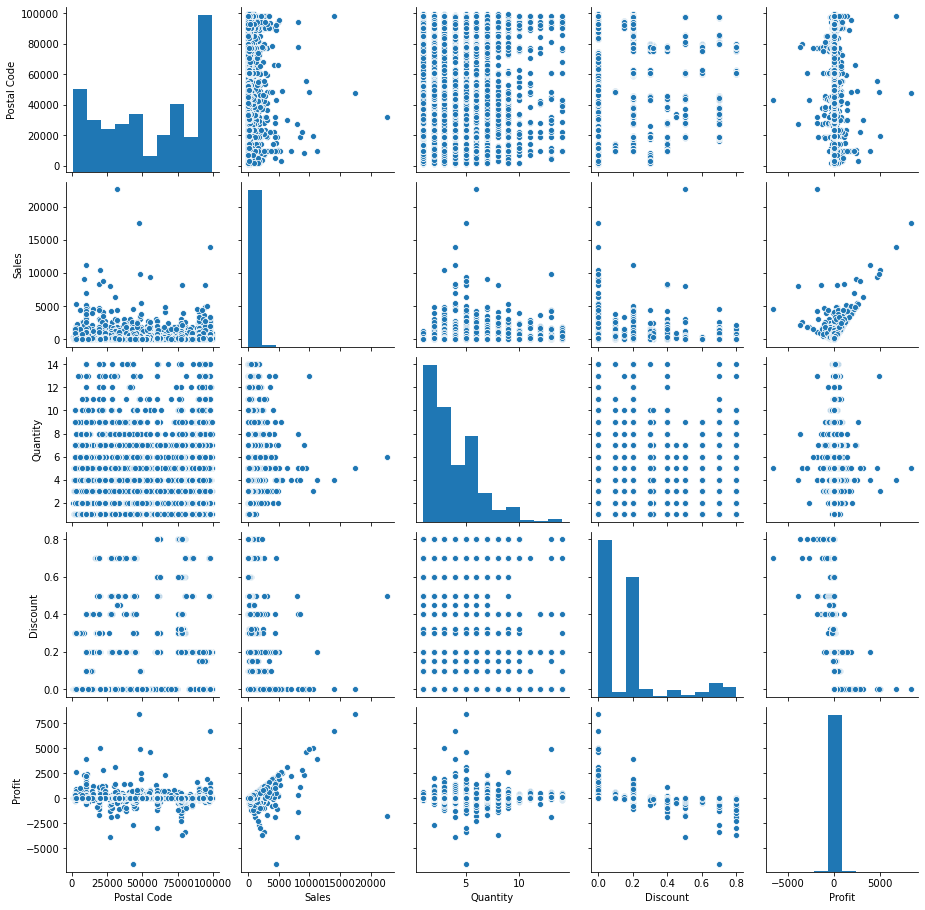

In [152]:
sn.pairplot(data)
plt.show()

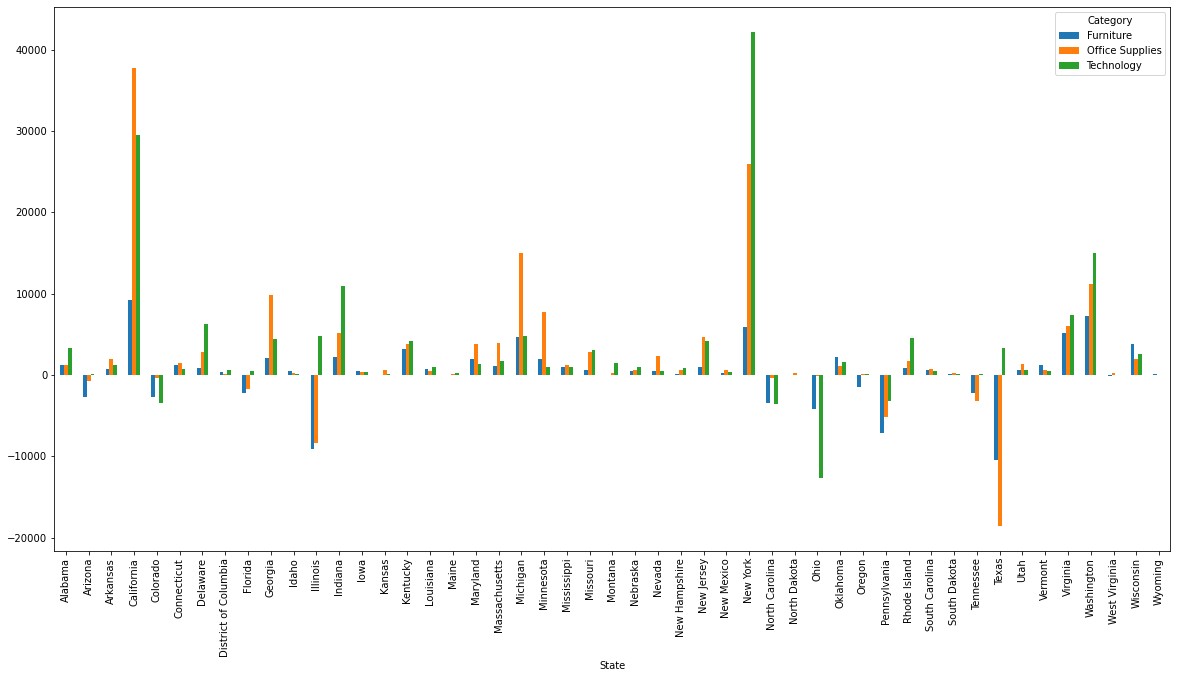

In [153]:
cs=pd.pivot_table(data,values="Profit",index="State",columns="Category",aggfunc=np.sum)
cs.plot(kind="bar",figsize=[20,10])
plt.show()

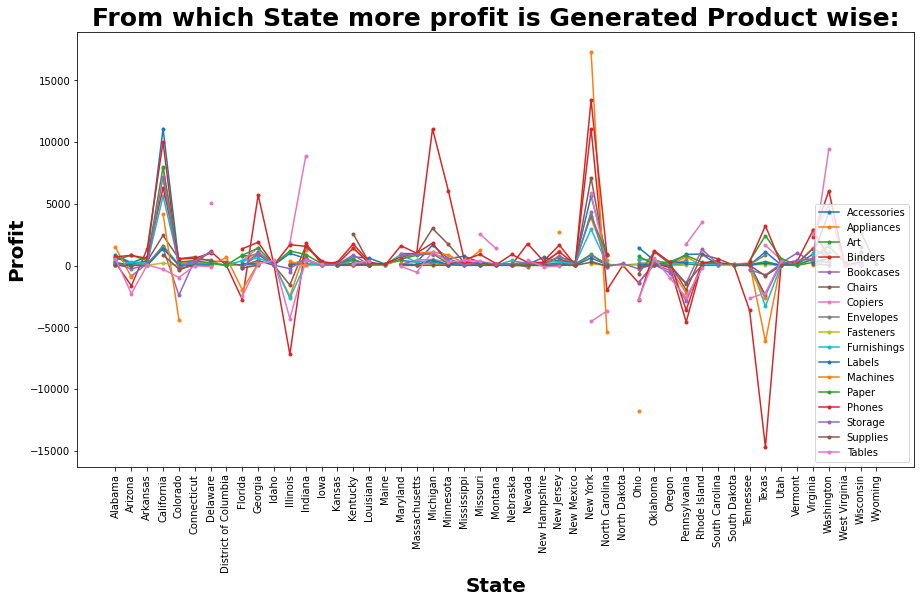

In [100]:
cs=pd.pivot_table(data,values="Profit",index="State",columns="Sub-Category",aggfunc=np.sum)

plt.figure(figsize=[15,8])
Iproduct=cs.columns
for Product in cs:
    if Product in Iproduct:
       
        #plt.scatter(cs.index,cs[Product],label=Product)
        plt.plot(cs.index,cs[Product],marker=".",label=Product)
        
        plt.legend()
        plt.xticks(rotation=90)
        plt.xlabel("State",fontdict={"fontweight":"bold","fontsize":20})
        plt.ylabel("Profit",fontdict={"fontweight":"bold","fontsize":20})
        plt.title("From which State more profit is Generated Product wise:",fontdict={"fontweight":"bold","fontsize":25})
        
        